# Car Price Prediction

This notebook explores car price prediction using two regression models:
1. **Linear Regression**: Captures overall trend.
2. **Lasso Regression**: Improves performance by penalizing irrelevant features.

The goal is to determine which model performs better on unseen test data using metrics like R² Score. Dataset is preprocessed, split, and evaluated thoroughly.


#Importing The Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Data Collection And Processing

In [ ]:
#loading the dataset into a pandas DataFrame
car_df=pd.read_csv('/content/car data.csv')

In [ ]:
#printing the first five rows of the dataset
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the number of rows and columns
car_df.shape

(301, 9)

In [ ]:
#getting some information about the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking the value count for Fuel_Type
car_df.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
#checking the value count for Seller_Type
car_df.Seller_Type.value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [ ]:
#checking the value count for Transmission
car_df.Transmission.value_counts()

,count
Transmission,
Manual,261
Automatic,40


#Encoding The Categorical Data

In [ ]:
#encoding Fuel_Type, Seller_Type,	Transmission
car_df=car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                'Seller_Type':{'Dealer':0,'Individual':1},
                'Transmission':{'Manual':0,'Automatic':1}})

/tmp/ipython-input-12-426871038.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df=car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},


In [ ]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Splitting The Data And The Label

In [ ]:
X=car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_df['Selling_Price']

In [ ]:
X,Y

(     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
 0    2014           5.59       27000  ...            0             0      0
 1    2013           9.54       43000  ...            0             0      0
 2    2017           9.85        6900  ...            0             0      0
 3    2011           4.15        5200  ...            0             0      0
 4    2014           6.87       42450  ...            0             0      0
 ..    ...            ...         ...  ...          ...           ...    ...
 296  2016          11.60       33988  ...            0             0      0
 297  2015           5.90       60000  ...            0             0      0
 298  2009          11.00       87934  ...            0             0      0
 299  2017          12.50        9000  ...            0             0      0
 300  2016           5.90        5464  ...            0             0      0
 
 [301 rows x 7 columns],
 0       3.35
 1       4.75
 2       7.25
 3     

#Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

#Model Training:
##Linear Regression

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

In [ ]:
#accuracy on training data
X_train_prediction=lin_reg_model.predict(X_train)
accuracy=metrics.r2_score(X_train_prediction,Y_train)
print('R Squared Error: ',accuracy)

R Squared Error:  0.8635655509198777


Text(0.5, 1.0, 'Actual Vs Predicted Price On Linear Regression')

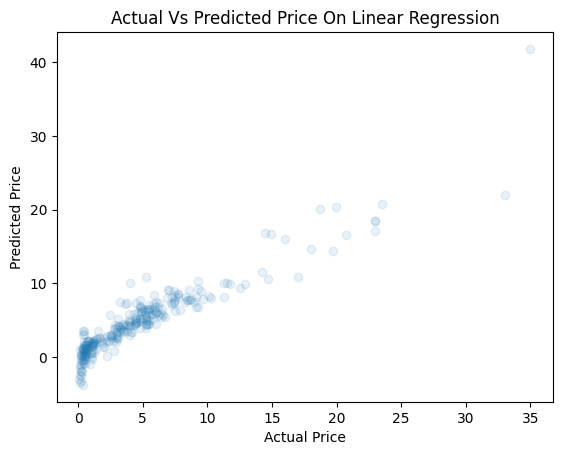

In [ ]:
#visualising the predicted vs actual points
plt.scatter(Y_train,X_train_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price On Linear Regression')

In [ ]:
#accuracy on test data
X_test_prediction=lin_reg_model.predict(X_test)
accuracy=metrics.r2_score(X_test_prediction,Y_test)
print('R Squared Error: ',accuracy)

R Squared Error:  0.8062199941176358


Text(0.5, 1.0, 'Actual Vs Predicted Price On Linear Regression')

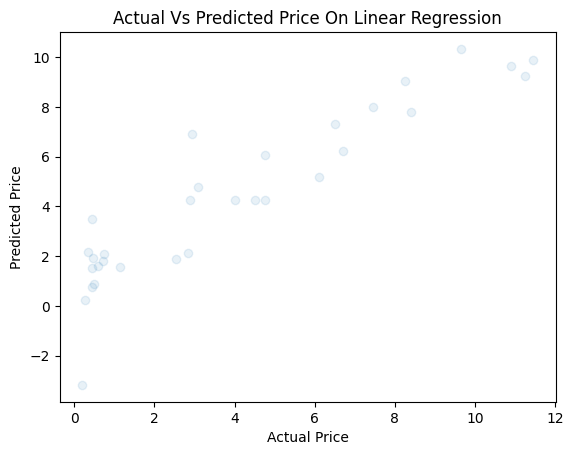

In [ ]:
#visualising the predicted vs actual points
plt.scatter(Y_test,X_test_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price On Linear Regression')

#Model Training:
##Lasso Regression

In [ ]:
las_reg_model=Lasso()

In [ ]:
las_reg_model.fit(X_train,Y_train)

Lasso()

#Model Evaluation

In [ ]:
#accuracy on training data
X_train_prediction=las_reg_model.predict(X_train)
accuracy=metrics.r2_score(X_train_prediction,Y_train)
print('R Squared Error: ',accuracy)

R Squared Error:  0.798459024070425


Text(0.5, 1.0, 'Actual Vs Predicted Price On Lasso Regression')

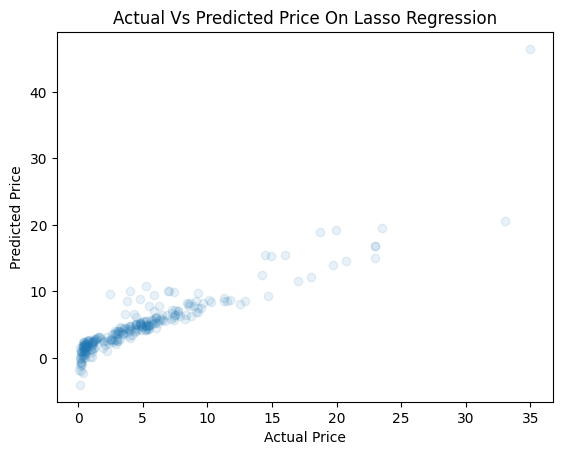

In [ ]:
#visualising the predicted vs actual points
plt.scatter(Y_train,X_train_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price On Lasso Regression')

In [ ]:
#accuracy on test data
X_test_prediction=las_reg_model.predict(X_test)
accuracy=metrics.r2_score(X_test_prediction,Y_test)
print('R Squared Error: ',accuracy)

R Squared Error:  0.7711110403265475


Text(0.5, 1.0, 'Actual Vs Predicted Price On Lasso Regression')

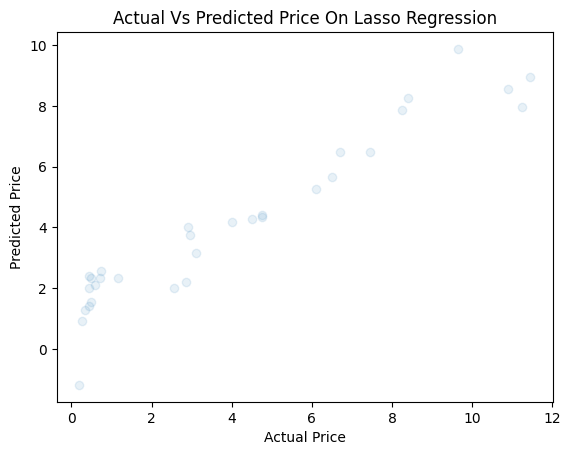

In [ ]:
#visualising the predicted vs actual points
plt.scatter(Y_test,X_test_prediction,alpha=0.1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price On Lasso Regression')

## Final Thoughts

We implemented and compared two ML models:
- **Linear Regression** gave more consistent performance.
- **Lasso Regression** reduced overfitting but underperformed slightly.

This shows that feature regularization is helpful but must be carefully tuned. Future work may include:
- Hyperparameter tuning (e.g., Lasso alpha)
- Feature engineering (like age of car)
